In [102]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (25,10)
mpl.rcParams['axes.grid'] = False

font = {'size': 40}
        # 'family' : 'normal',
        # 'weight' : 'bold',

mpl.rc('font', **font)

# pd.set_option('display.max_columns', None)  # or 1000
# pd.set_option('display.max_rows', None)  # or 1000
# pd.set_option('display.max_colwidth', None)  # or 199

In [103]:
df = pd.read_csv('garmin5.csv')
df.columns = ['DeviceID', 'DataType', 'Timestamp', 'Magnitude', 'X', 'Y', 'Z']
# df.drop(1295, inplace=True)

In [104]:
for column in df.columns:
    print(f'{column}: {df[column].dtype}')

DeviceID: object
DataType: object
Timestamp: object
Magnitude: float64
X: int64
Y: int64
Z: int64


In [105]:
df['DeviceID'] = df.DeviceID.astype('string')
df['DataType'] = df.DataType.astype('string')
df['Magnitude'] = df.Magnitude.astype('float')
# df.index = pd.to_datetime(df.Timestamp)
df['X'] = df.X.astype('float')
df['Y'] = df.Y.astype('float')
df['Z'] = df.Z.astype('float')
# df.index = df.Timestamp
# df.drop('Timestamp', axis=1, inplace=True)

In [106]:
for column in df.columns:
    print(f'{column}: {df[column].dtype}')

DeviceID: string
DataType: string
Timestamp: object
Magnitude: float64
X: float64
Y: float64
Z: float64


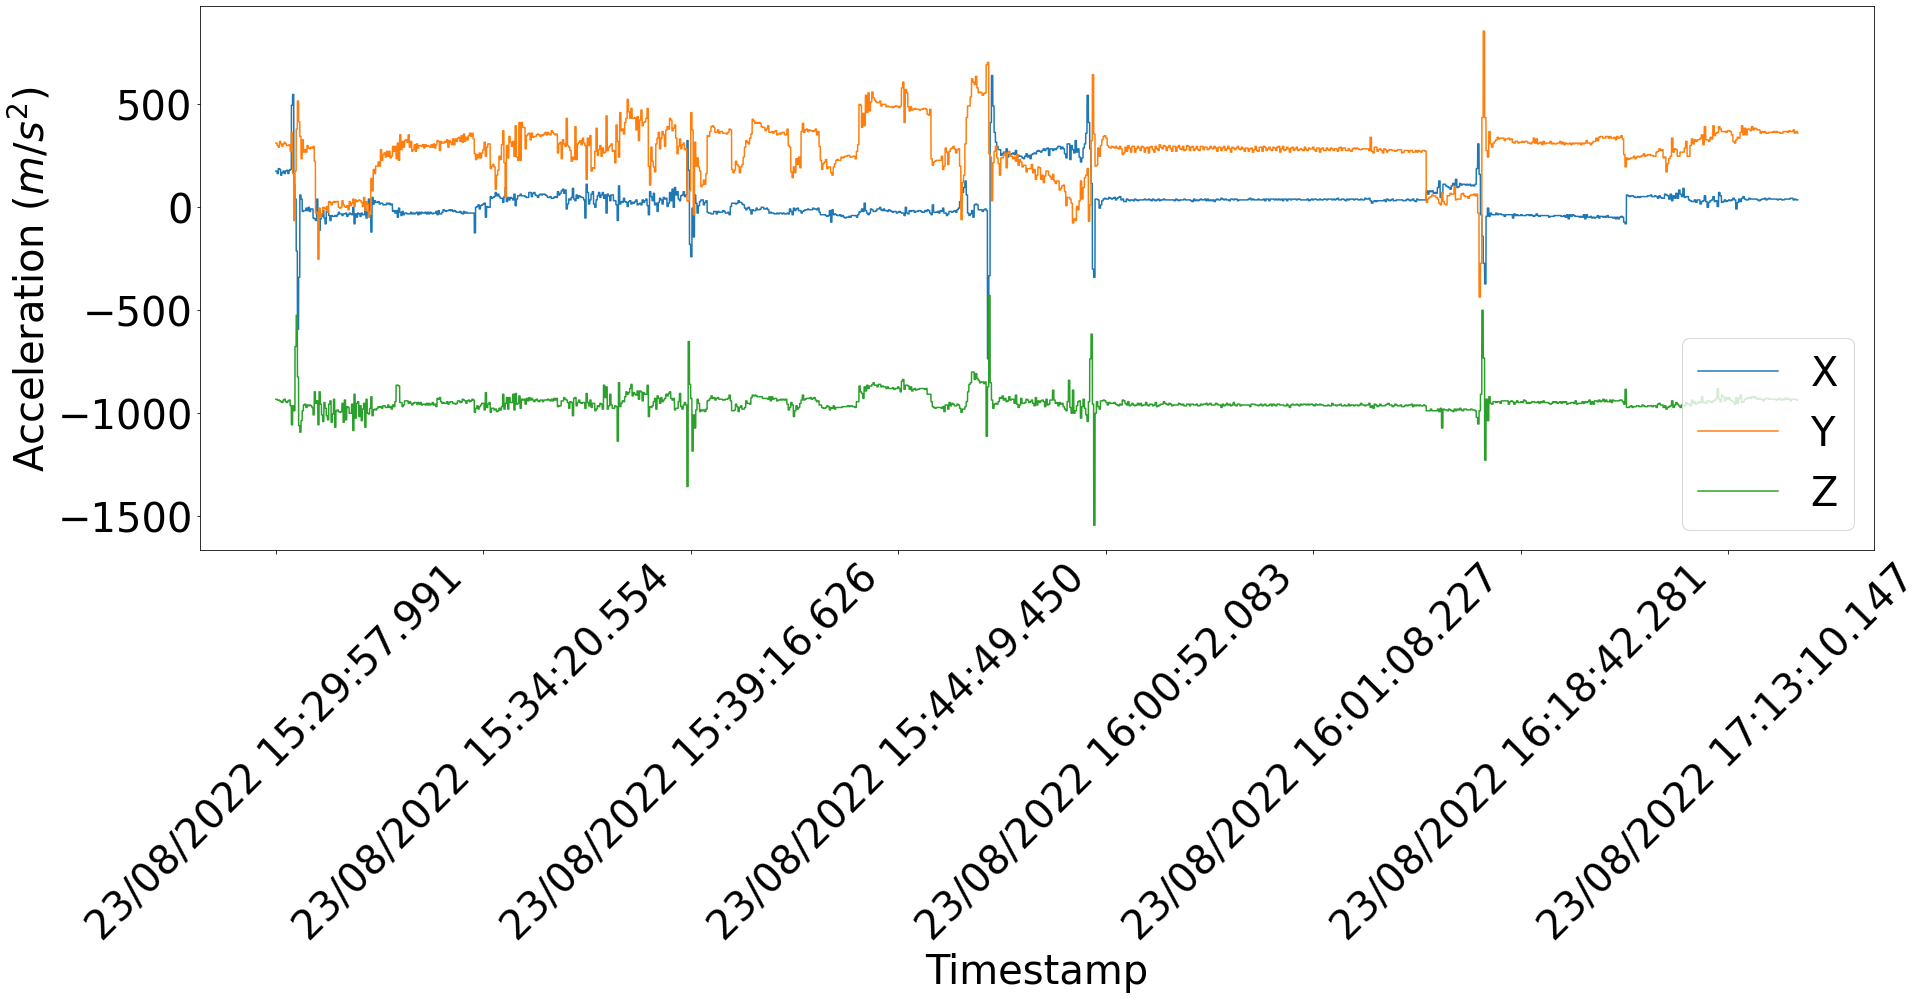

In [112]:
df.plot(x='Timestamp', y=["X", "Y", "Z"], figsize=(30, 10))
plt.xticks(rotation=45)
plt.ylabel('Acceleration ($m/s^2$)')
plt.savefig(f'./raw_accelerometer.jpg', bbox_inches='tight')
plt.legend(['X', 'Y', 'Z'], loc='lower right')
plt.show()

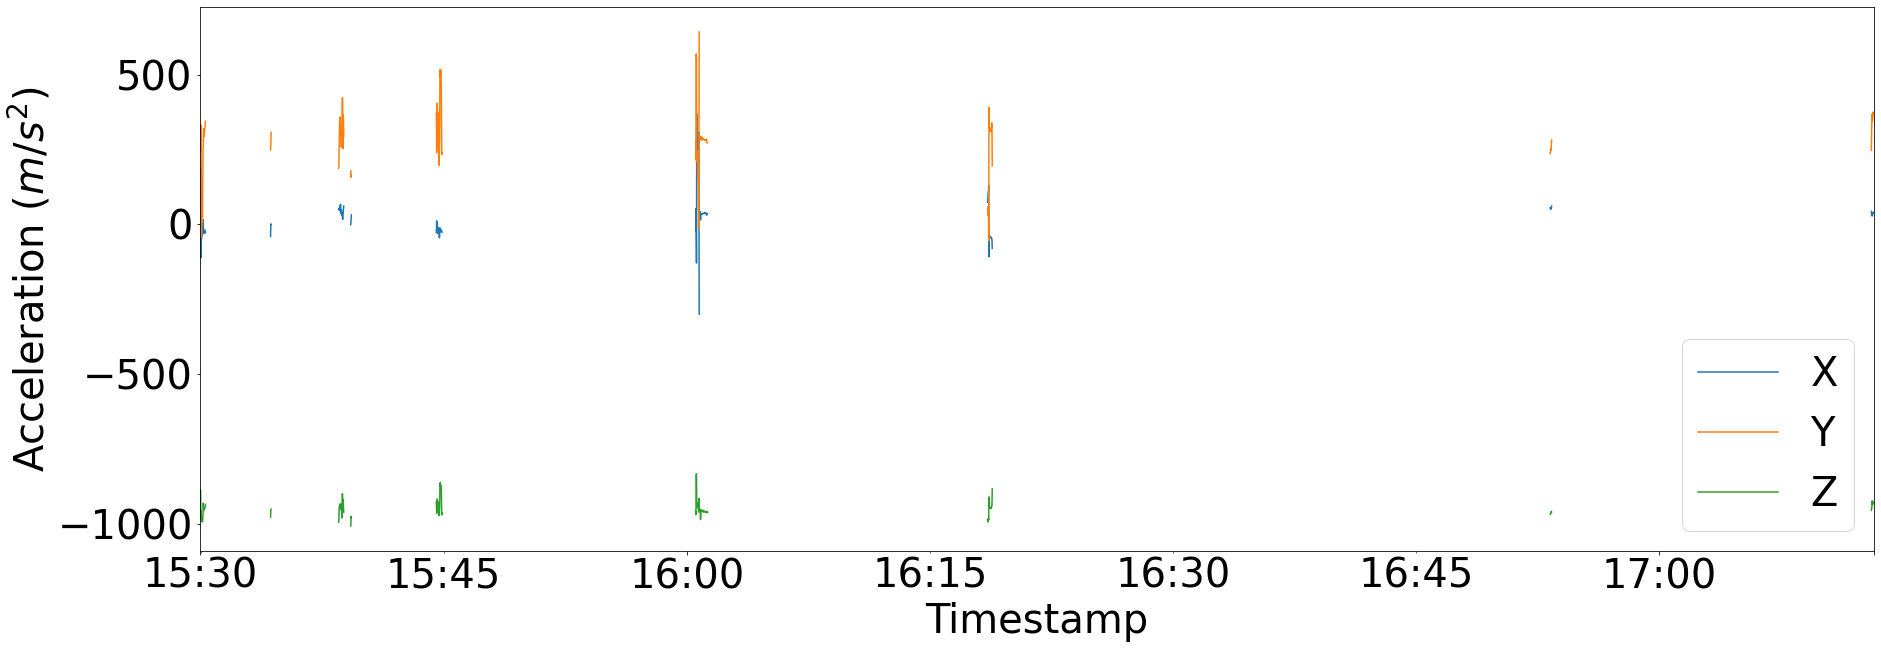

In [113]:
df.Timestamp = df.Timestamp.astype('datetime64[ms]')
df.index = df.Timestamp
resampled = df.resample('1S').mean()
resampled.plot(y=["X", "Y", "Z"], figsize=(30, 10))
plt.ylabel('Acceleration ($m/s^2$)')
plt.savefig(f'./resampled_accelerometer.jpg', bbox_inches='tight')
plt.legend(['X', 'Y', 'Z'], loc='lower right')
plt.show()

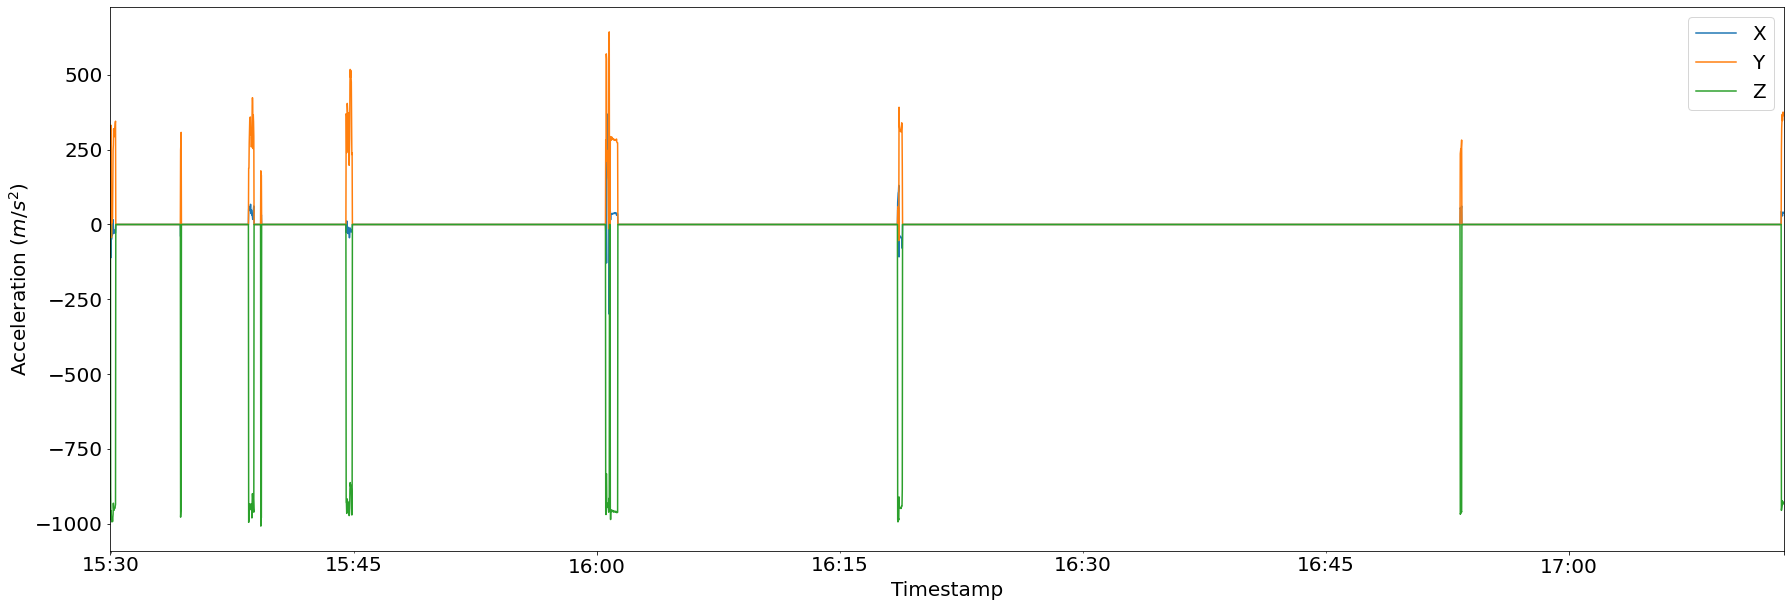

In [97]:
resampled.fillna(0).plot(y=["X", "Y", "Z"], figsize=(30, 10))
plt.ylabel('Acceleration ($m/s^2$)')
plt.savefig(f'./resampled_filled_accelerometer.jpg', bbox_inches='tight')
plt.legend(['X', 'Y', 'Z'], loc='lower right')
plt.show()

In [100]:
resampled.index.min()

Timestamp('2022-08-23 15:29:57', freq='S')

In [101]:
resampled.index.max()

Timestamp('2022-08-23 17:13:15', freq='S')